In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
%matplotlib inline

In [2]:
Calo=pd.read_csv("C:/Users/Dmwin\Downloads/Jupiter/datasets/activity_data.csv")

In [3]:
Calo.head()

,Id,Date,TotalSteps,TotalDistance,SedentaryMinutes,TotalActiveMinutes,Calories
0,6117666160,2016-04-21,19542,15.010000,579,324,4900
1,5577150313,2016-04-17,12231,9.140000,525,396,4552
2,8877689391,2016-04-16,29326,25.290001,888,552,4547
3,5577150313,2016-05-01,13368,9.990000,499,444,4546
4,5577150313,2016-04-30,12363,9.240000,621,415,4501


In [4]:
Calo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  940 non-null    int64  
 1   Date                940 non-null    object 
 2   TotalSteps          940 non-null    int64  
 3   TotalDistance       940 non-null    float64
 4   SedentaryMinutes    940 non-null    int64  
 5   TotalActiveMinutes  940 non-null    int64  
 6   Calories            940 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 51.5+ KB


In [5]:
Calo.isnull().sum()

Id                    0
Date                  0
TotalSteps            0
TotalDistance         0
SedentaryMinutes      0
TotalActiveMinutes    0
Calories              0
dtype: int64

In [6]:
bins = (2, 2000, 5000)
group_names = ['under target','over target']
Calo['Calories']= pd.cut(Calo['Calories'], bins=bins, labels=group_names)
Calo['Calories'].unique()

['over target', 'under target', NaN]
Categories (2, object): ['under target' < 'over target']

In [7]:
Calo['Calories'].value_counts()

Calories
over target     571
under target    365
Name: count, dtype: int64

In [8]:
label_Calories=LabelEncoder()

In [9]:
Calo['Calories']=label_Calories.fit_transform(Calo['Calories'])

In [10]:
Calo['Calories'].value_counts()

Calories
0    571
1    365
2      4
Name: count, dtype: int64

In [11]:
Calo.tail()

,Id,Date,TotalSteps,TotalDistance,SedentaryMinutes,TotalActiveMinutes,Calories
935,3977333714,2016-05-11,746,0.5,13,13,1
936,1503960366,2016-05-12,0,0.0,1440,0,2
937,6290855005,2016-05-10,0,0.0,1440,0,2
938,8253242879,2016-04-30,0,0.0,1440,0,2
939,8583815059,2016-05-12,0,0.0,1440,0,2


<Axes: xlabel='Calories', ylabel='count'>

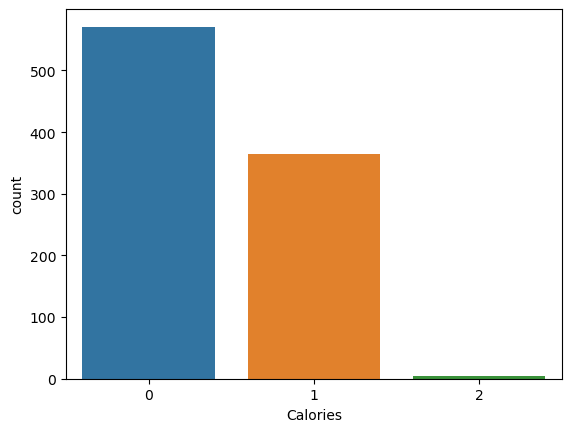

In [12]:
df=pd.DataFrame({'Calories': Calo['Calories']})
sns.countplot(data=df, x='Calories')

In [13]:
data=['TotalSteps','TotalDistance','SedentaryMinutes', 'TotalActiveMinutes']

In [14]:
X = Calo[data]
y = Calo['Calories']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
sc = StandardScaler()

In [17]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

Random forest classifier

In [18]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [19]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       121
           1       0.64      0.70      0.67        67

    accuracy                           0.76       188
   macro avg       0.73      0.74      0.74       188
weighted avg       0.76      0.76      0.76       188



SVM Classifier

In [20]:
clf=SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [21]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       121
           1       0.60      0.66      0.63        67

    accuracy                           0.72       188
   macro avg       0.70      0.71      0.70       188
weighted avg       0.73      0.72      0.73       188



Neural Network

In [22]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=1500)
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)

In [23]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       121
           1       0.67      0.75      0.70        67

    accuracy                           0.78       188
   macro avg       0.76      0.77      0.76       188
weighted avg       0.78      0.78      0.78       188

[[96 25]
 [17 50]]


In [24]:
Xnew=[[1200,1, 20, 40]]
ynew=mlpc.predict(Xnew)

print(ynew)

[1]
